In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [171]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

df = pd.read_csv('NYPD_arrest_data_2021-2023.csv', dtype=data_types)

In [172]:
df.head()

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,2022-10-16,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Brooklyn,76,2.0,25-44,Male,BLACK,40.676869,-74.006640,POINT (-74.00664 40.676869)
1,2022-04-12,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201602,Felony,Manhattan,14,0.0,18-24,Male,BLACK,40.753533,-73.994537,POINT (-73.9945368920152 40.7535327012632)
2,2022-03-19,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Brooklyn,60,0.0,25-44,Male,WHITE,40.582620,-73.986223,POINT (-73.986223 40.58262)
3,2022-08-24,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,Felony,Brooklyn,84,0.0,18-24,Male,WHITE HISPANIC,40.690115,-73.989019,POINT (-73.989019 40.690115)
4,2022-01-07,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,Felony,Manhattan,24,2.0,25-44,Male,BLACK,40.796074,-73.967067,POINT (-73.9670667458109 40.7960743128304)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412713 entries, 0 to 412712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ARREST_DATE        412713 non-null  object  
 1   PD_DESC            412713 non-null  category
 2   KY_CD              412713 non-null  float64 
 3   OFNS_DESC          412713 non-null  category
 4   LAW_CODE           412713 non-null  category
 5   LAW_CAT_CD         412713 non-null  category
 6   ARREST_BORO        412713 non-null  category
 7   ARREST_PRECINCT    412713 non-null  category
 8   JURISDICTION_CODE  412713 non-null  category
 9   AGE_GROUP          412713 non-null  category
 10  PERP_SEX           412713 non-null  category
 11  PERP_RACE          412713 non-null  category
 12  Latitude           412713 non-null  float64 
 13  Longitude          412713 non-null  float64 
 14  Lon_Lat            412713 non-null  object  
dtypes: category(10), float64(3), objec

In [174]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [ ]:
min_year = df['ARREST_DATE'].min()
max_year = df['ARREST_DATE'].max()

print(f'The earliest recoreded arrest date is {min_year} and the latest is {max_year}')

### Arrests by Month

In [175]:
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month
unique_months = df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)


Unique months listed in the ARREST_DATE column:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [176]:
df['LAW_CAT_CD'].unique()

['Felony', 'Misdemeanor', 'Violation', 'Traffic', 'Unclassified Violation']
Categories (5, object): ['Felony', 'Misdemeanor', 'Traffic', 'Violation', 'Unclassified Violation']

In [229]:
law_cat_order

['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']

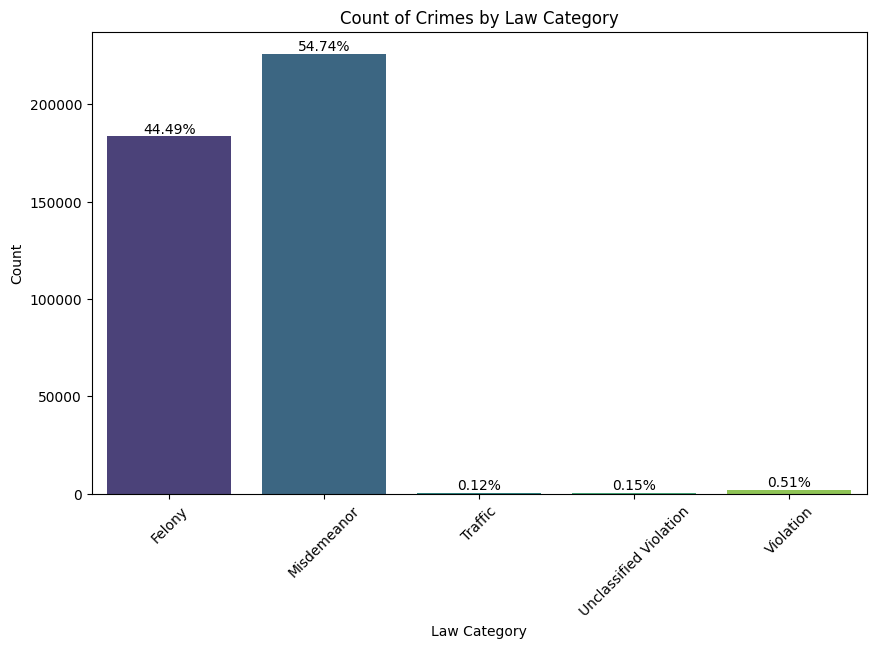

In [228]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='LAW_CAT_CD', order=law_cat_order, palette='viridis')
total_count = df.shape[0]
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Crimes by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


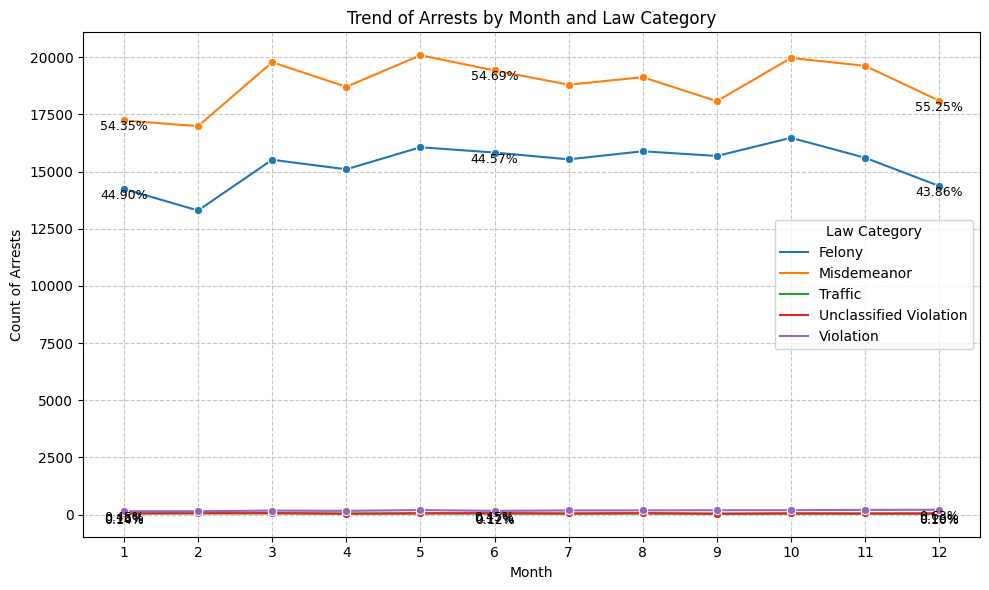

In [178]:
agg_df = df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
plt.title('Trend of Arrests by Month and Law Category')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(unique_months)  # Set x-axis ticks to match the selected months
plt.legend(title='Law Category')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()
months_of_interest = [1, 6, 12]
for month in months_of_interest:
    total_count = total_counts.loc[month]
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        percentage = (row['count'] / total_count) * 100
        plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Arrests by Borough

#### Bronx

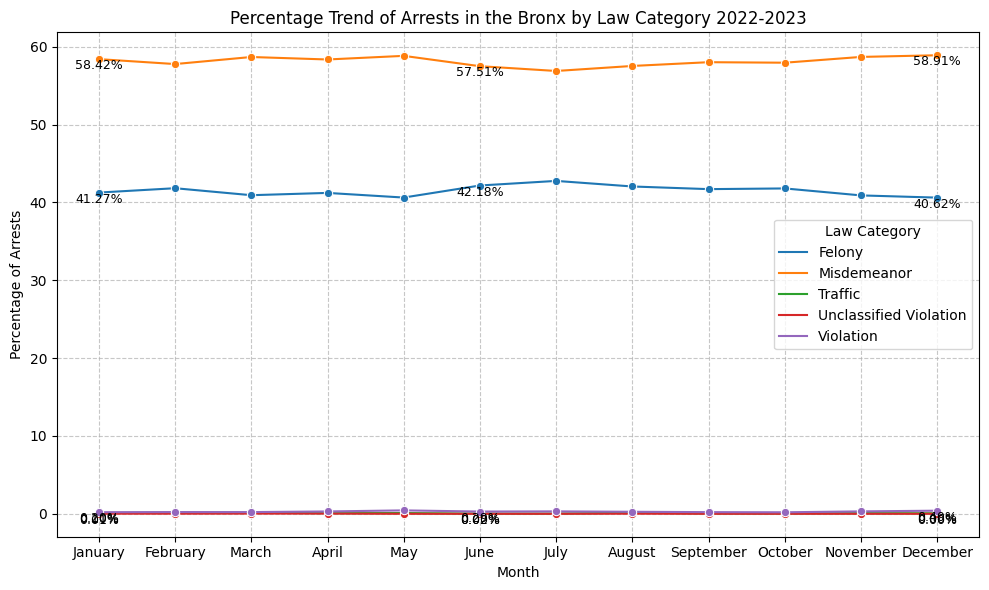

In [179]:
bronx_df = df[df['ARREST_BORO'] == 'Bronx']
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')

total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df = agg_df.merge(total_counts, on='ARREST_MONTH')

agg_df['percentage'] = (agg_df['count'] / agg_df['total_count']) * 100
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months = range(1, 13)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
months_of_interest = [1, 6, 12] 
for month in months_of_interest:
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)
plt.title('Percentage Trend of Arrests in the Bronx by Law Category 2022-2023')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Queens

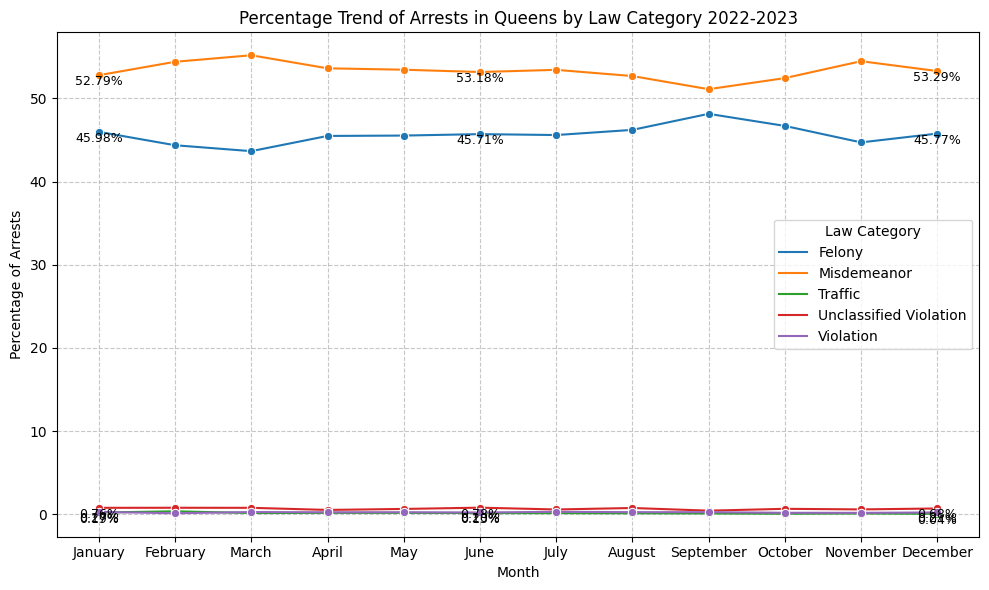

In [180]:
queens_df = df[df['ARREST_BORO'] == 'Queens']
agg_df = queens_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df = agg_df.merge(total_counts, on='ARREST_MONTH')
agg_df['percentage'] = (agg_df['count'] / agg_df['total_count']) * 100
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months = range(1, 13)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
months_of_interest = [1, 6, 12] 
for month in months_of_interest:
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('Percentage Trend of Arrests in Queens by Law Category 2022-2023')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


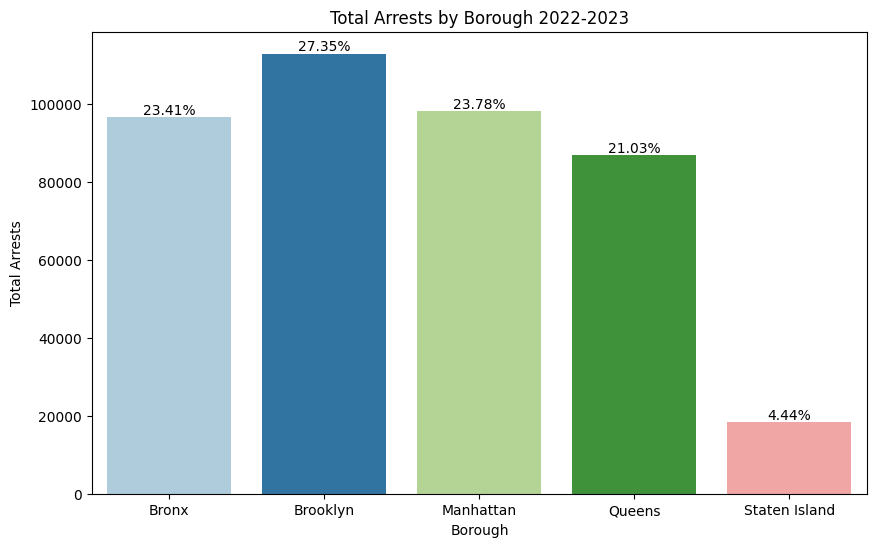

In [181]:
arrests_by_borough = df.groupby('ARREST_BORO').size().reset_index(name='Total_Arrests')
plt.figure(figsize=(10,6))
total_count = arrests_by_borough['Total_Arrests'].sum()
ax = sns.barplot(data= arrests_by_borough, x='ARREST_BORO', y='Total_Arrests',palette='Paired')
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


plt.title('Total Arrests by Borough 2022-2023')
plt.xlabel('Borough')
plt.ylabel('Total Arrests')
plt.show()

### Geospatial Plotting

#### Felonies

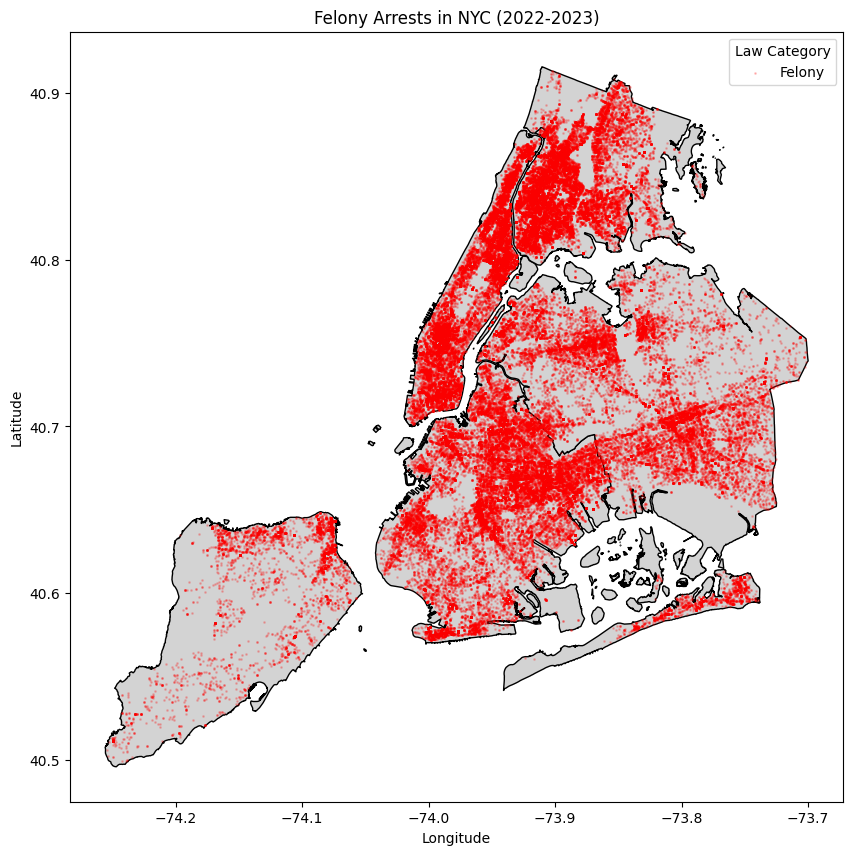

In [182]:
gdf_arrests = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

gdf_arrests.set_crs(epsg=4326, inplace=True)
gdf_felonies = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == 'Felony']
gdf_nyc = gpd.read_file("Borough Boundaries.zip")
gdf_nyc = gdf_nyc.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(14, 10))
gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_felonies.plot(ax=ax, markersize=1, alpha=0.2, color='red', label='Felony')
plt.title('Felony Arrests in NYC (2022-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Law Category')

# Show plot
plt.savefig('2022-2023 Felony GeoSpatial Plotting')
plt.show()


#### Misdomeanor

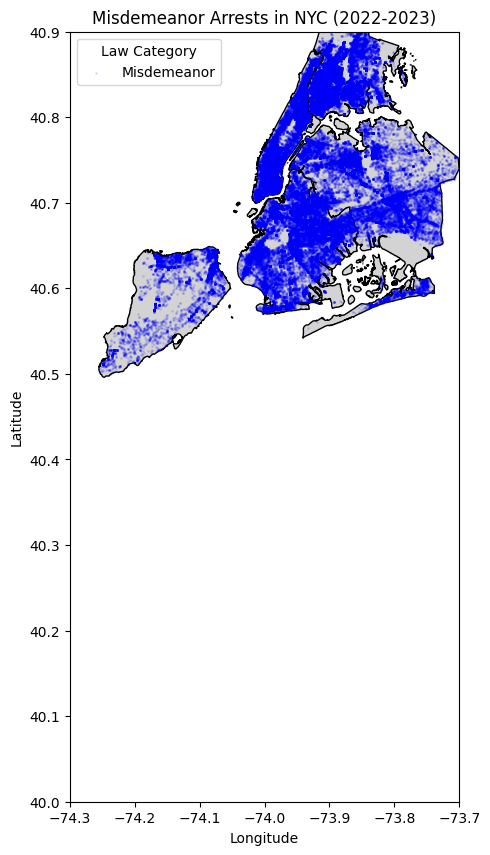

In [183]:
gdf_arrests = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)
gdf_arrests.set_crs(epsg=4326, inplace=True)
def plot_arrests_by_category(category, color, title, filename):
    gdf_category = gdf_arrests[gdf_arrests['LAW_CAT_CD'] == category]
    
    # Needed to filter as the displayed Geomap was too small but still cutting off Manhattan
    gdf_category = gdf_category[
        (gdf_category['Longitude'] >= -74.3) & 
        (gdf_category['Longitude'] <= -73.7) & 
        (gdf_category['Latitude'] >= 40) & 
        (gdf_category['Latitude'] <= 41)
    ]
    gdf_nyc = gpd.read_file("Borough Boundaries.zip")
    gdf_nyc = gdf_nyc.to_crs(epsg=4326)
    fig, ax = plt.subplots(figsize=(14, 10))
    gdf_nyc.plot(ax=ax, color='lightgrey', edgecolor='black')
    gdf_category.plot(ax=ax, markersize=1, alpha=0.1, color=color, label=category)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-74.3, -73.7)
    plt.ylim(40, 40.9)
    plt.legend(title='Law Category')
    plt.show()
plot_arrests_by_category('Misdemeanor', 'blue', 'Misdemeanor Arrests in NYC (2022-2023)',filename='Borough Boundaries.zip')


### Sex

#### Felonies/Misdemeanors Committed by Perp Sex

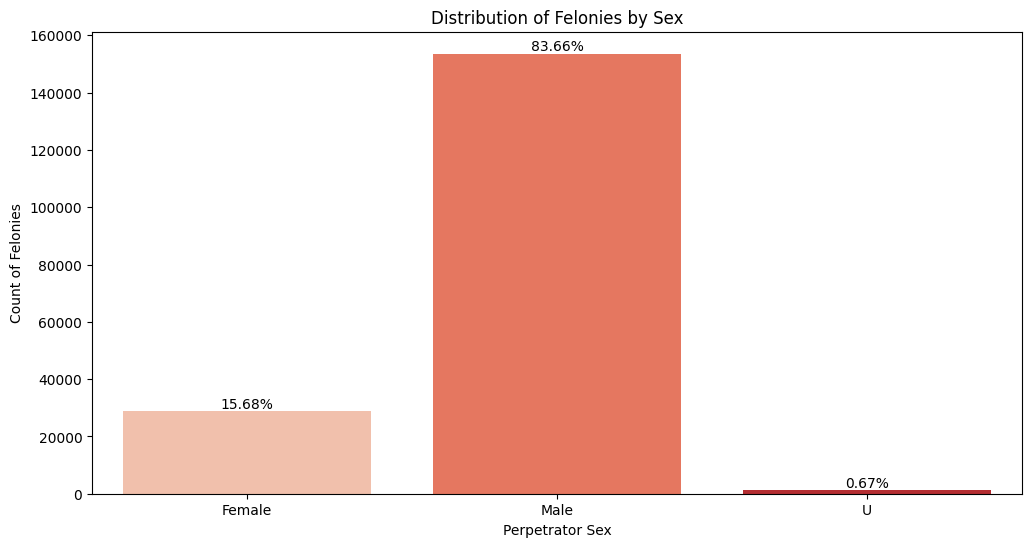

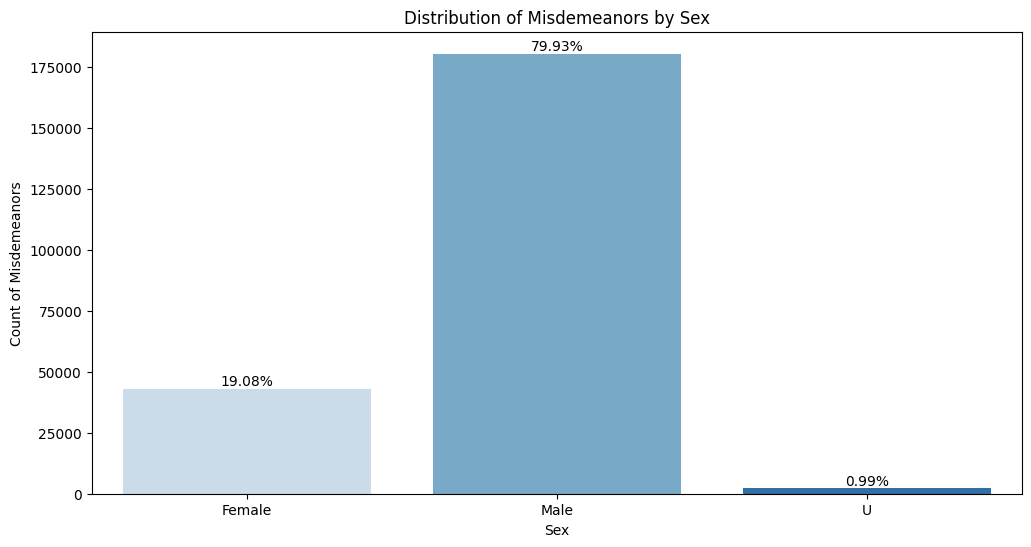

In [184]:
felonies = df[df['LAW_CAT_CD'] == 'Felony']
misdemeanors = df[df['LAW_CAT_CD'] == 'Misdemeanor']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Felonies
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=felonies, x='PERP_SEX', palette='Reds')
total_felonies = len(felonies)
add_annotations(ax, total_felonies)
plt.title('Distribution of Felonies by Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count of Felonies')
plt.show()


#Misdemeanor
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=misdemeanors, x='PERP_SEX', palette='Blues')
total_misdemeanors = len(misdemeanors)
add_annotations(ax, total_misdemeanors)
plt.title('Distribution of Misdemeanors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Misdemeanors')
plt.show()


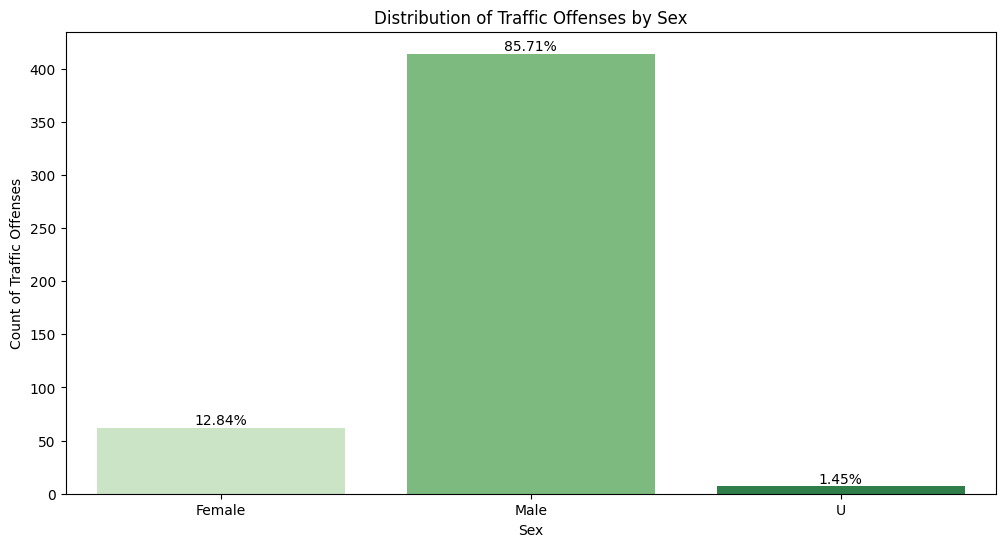

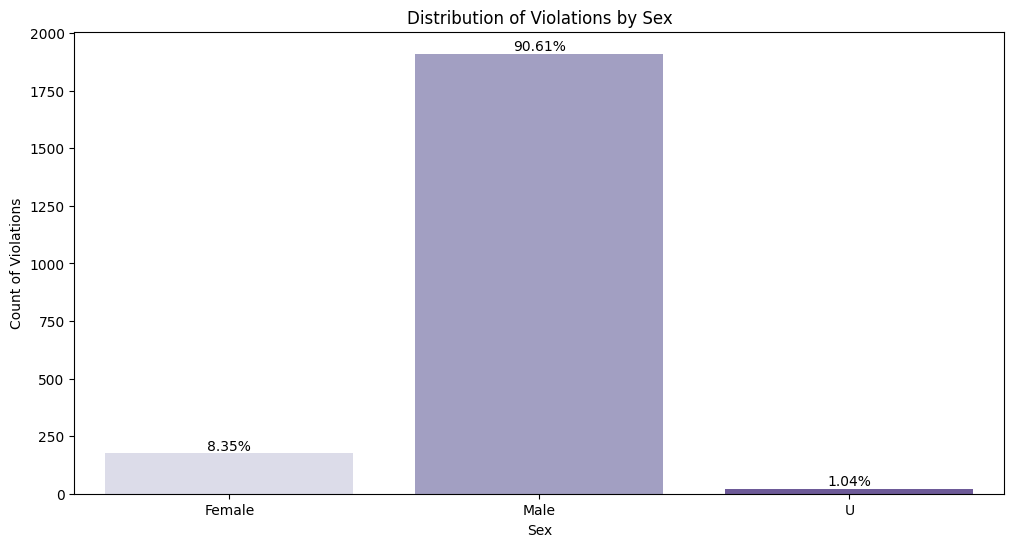

In [185]:
traffic = df[df['LAW_CAT_CD'] == 'Traffic']
violations = df[df['LAW_CAT_CD'] == 'Violation']

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Traffic
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=traffic, x='PERP_SEX', palette='Greens')
total_traffic = len(traffic)
add_annotations(ax, total_traffic)
plt.title('Distribution of Traffic Offenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Traffic Offenses')
plt.show()

# Volation
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=violations, x='PERP_SEX', palette='Purples')
total_violations = len(violations)
add_annotations(ax, total_violations)
plt.title('Distribution of Violations by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Violations')
plt.show()



In [186]:
sex_count = df['PERP_SEX'].value_counts()
sex_ratio = sex_count['Male']/sex_count['Female']
print(f"Male to Female Arrest Ratio: {sex_ratio:.2f}")

Male to Female Arrest Ratio: 4.67


### Age Group

In [187]:
df[['AGE_GROUP']].describe()

,AGE_GROUP
count,412713
unique,5
top,25-44
freq,237328


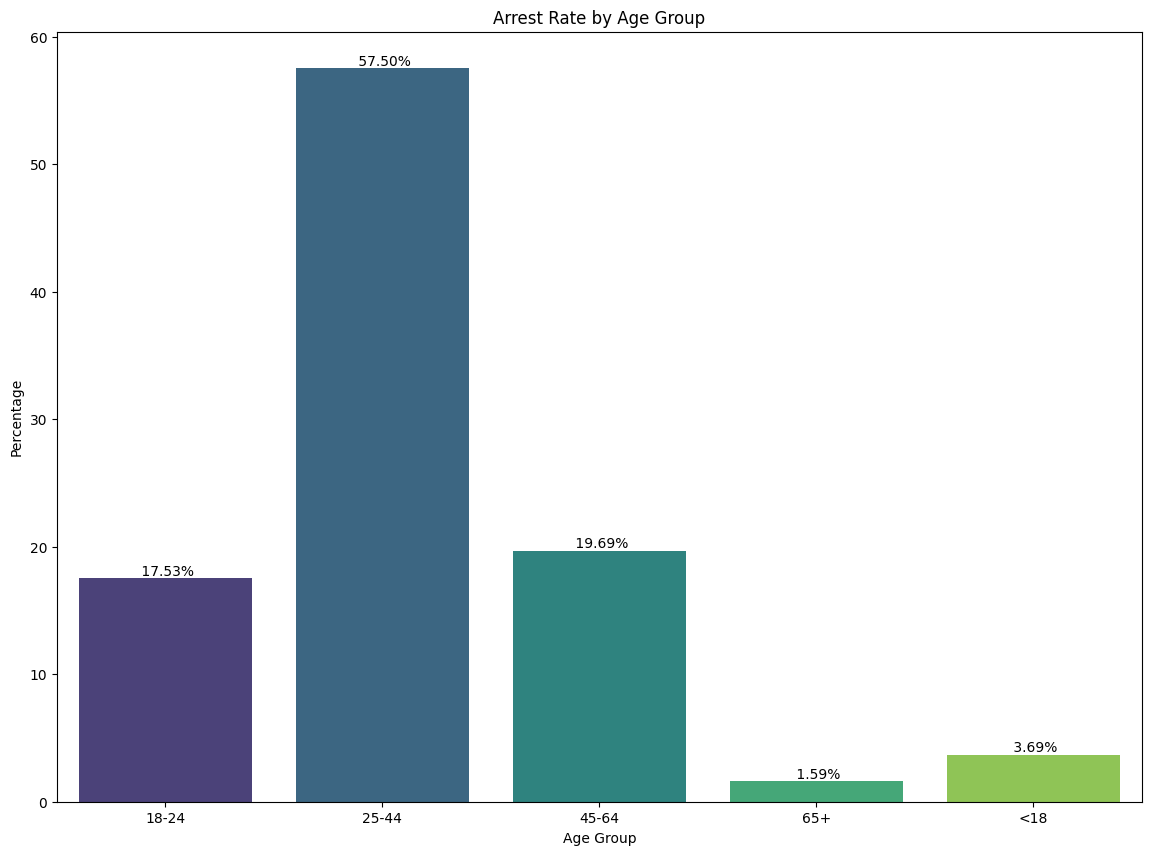

In [188]:
age_group_counts = df['AGE_GROUP'].value_counts(normalize=True)*100
age_group_counts
plt.figure(figsize=(14,10))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette = 'viridis')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Arrest Rate by Age Group')
for p in ax.patches:
    ax.annotate(f'{p.get_height(): .2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va= 'center', fontsize= 10, color = 'black',
                xytext= (0,5), textcoords = 'offset points')

plt.show()

Its important to take a look into what kind of crimes are bieng committed within respective age groups, as I have strong incliniation to believe that indviduals from 45-65+ are being arrested for traffic/violations

In [189]:
age_group_18_24_df = df[df['AGE_GROUP'] == '18-24']
agg_df = age_group_18_24_df['LAW_CAT_CD'].value_counts().reset_index()
agg_df

,index,LAW_CAT_CD
0,Misdemeanor,36774
1,Felony,35072
2,Violation,325
3,Unclassified Violation,85
4,Traffic,84


#### Felonies

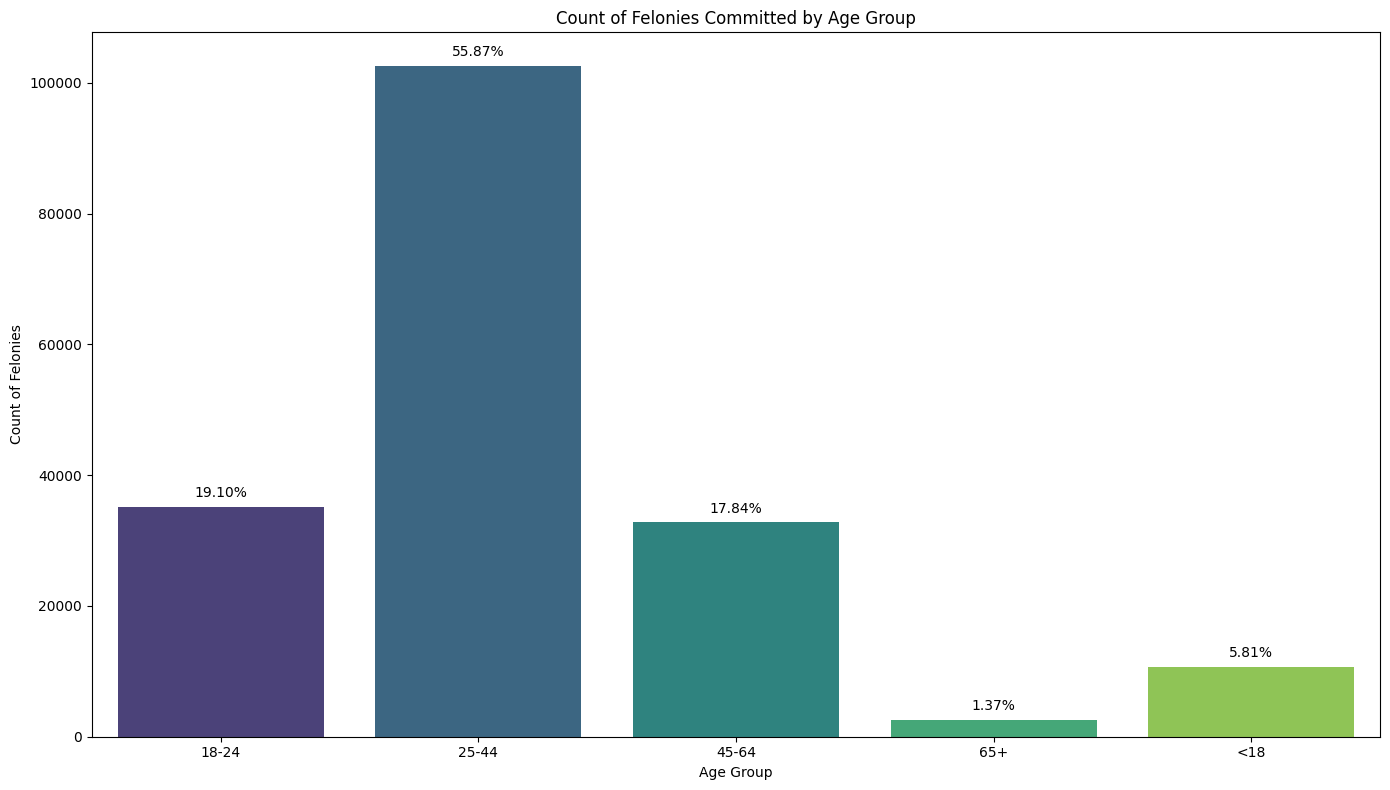

In [190]:
felony_df = df[df['LAW_CAT_CD'] == 'Felony']
agg_df = felony_df['AGE_GROUP'].value_counts().reset_index()
agg_df.columns = ['AGE_GROUP', 'count']
agg_df = agg_df.sort_values(by='AGE_GROUP')
total_felonies = agg_df['count'].sum()
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=agg_df, x='AGE_GROUP', y='count', palette='viridis')
ax.set_title('Count of Felonies Committed by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Felonies')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_felonies) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


#### Misdemeanor 

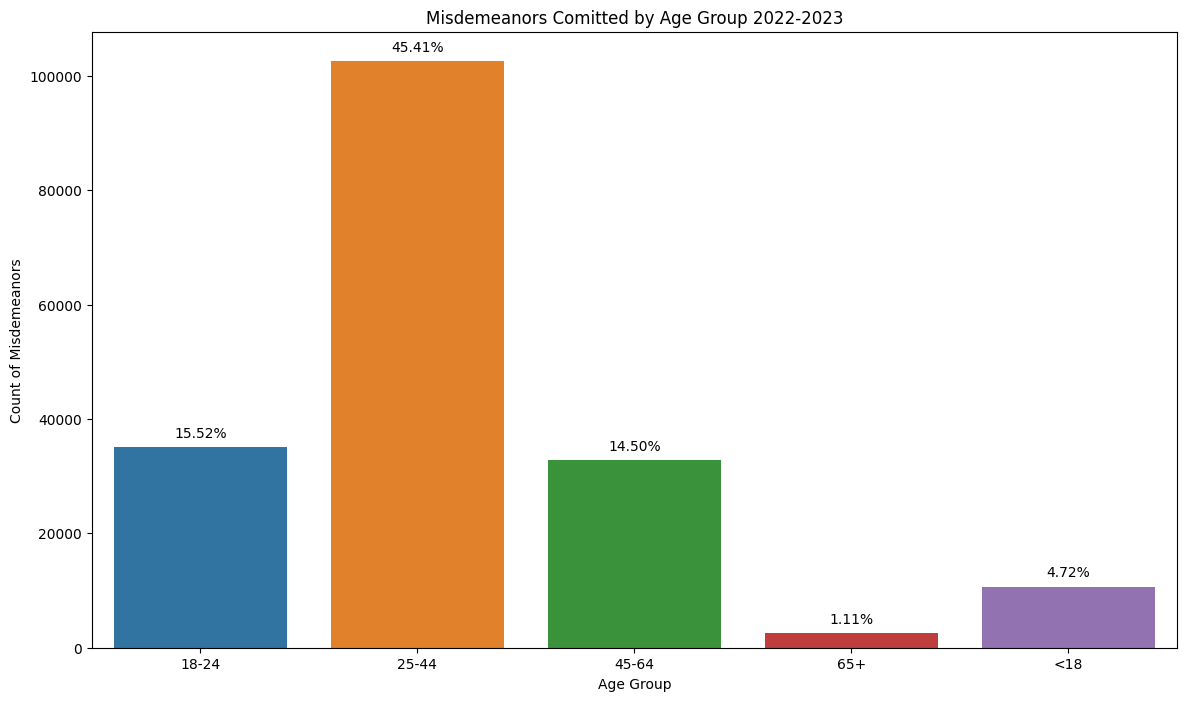

In [191]:
misdemeanor_df = df[df['LAW_CAT_CD']== 'Misdemeanor']
agg_df_2 = misdemeanor_df['AGE_GROUP'].value_counts().reset_index()
agg_df_2.columns = ['AGE_GROUP', 'count']
agg_df_2= agg_df.sort_values(by='AGE_GROUP')
plt.figure(figsize = (14,8))
ax = sns.barplot( data = agg_df_2, x = 'AGE_GROUP',y='count')
ax.set_title('Misdemeanors Comitted by Age Group 2022-2023')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count of Misdemeanors')


for p in ax.patches:
    height = p.get_height()
    percentage = (height/ total_misdemeanors) *100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va = 'bottom', fontsize = 10, color = 'black',
                xytext = (0,5), textcoords = 'offset points')


#### Traffic

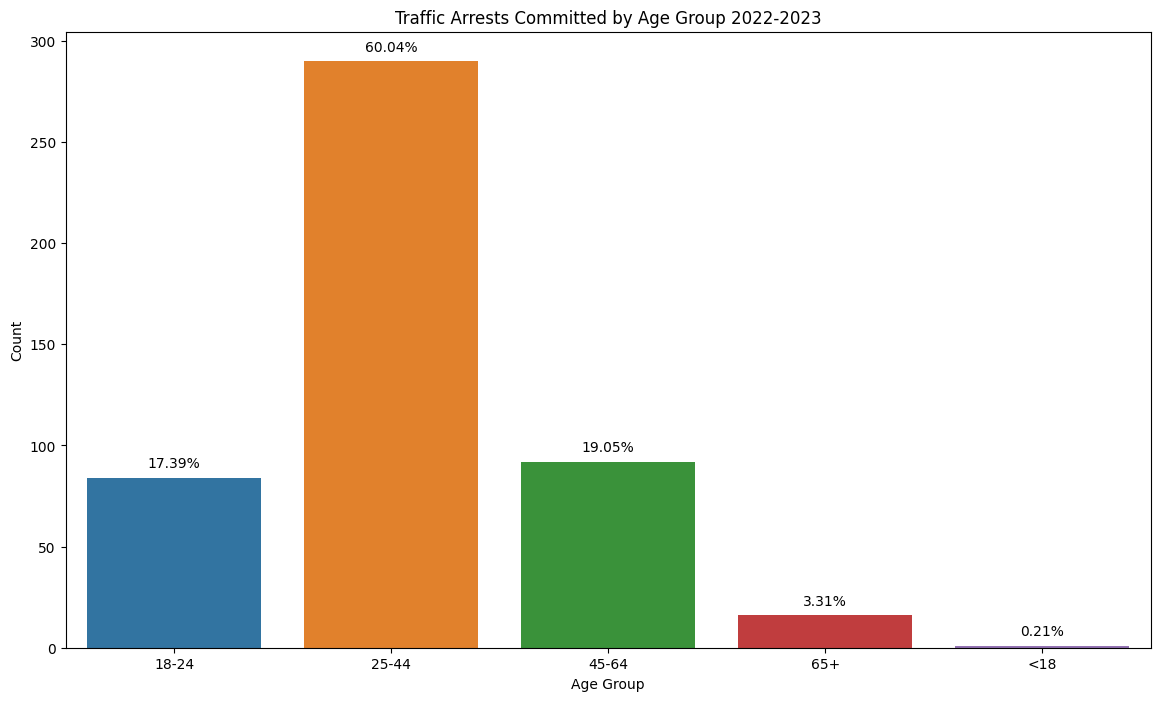

In [192]:
traffic=df[df['LAW_CAT_CD']=='Traffic']

agg_df_3 = traffic_df['AGE_GROUP'].value_counts().reset_index()
agg_df_3.columns = ['AGE_GROUP','count']
agg_df_3 = agg_df_3.sort_values(by='AGE_GROUP') 
plt.figure(figsize= (14,8))
ax = sns.barplot(data=agg_df_3, x='AGE_GROUP', y='count')
ax.set_title('Traffic Arrests Committed by Age Group 2022-2023')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
total_traffic = len(traffic)

for p in ax.patches:
    height = p.get_height()
    traffic_percentage = (height/total_traffic)*100
    ax.annotate(f'{traffic_percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha= 'center', va='bottom', fontsize=10, color='black',
                    xytext=(0,5), textcoords ='offset points')

# Race

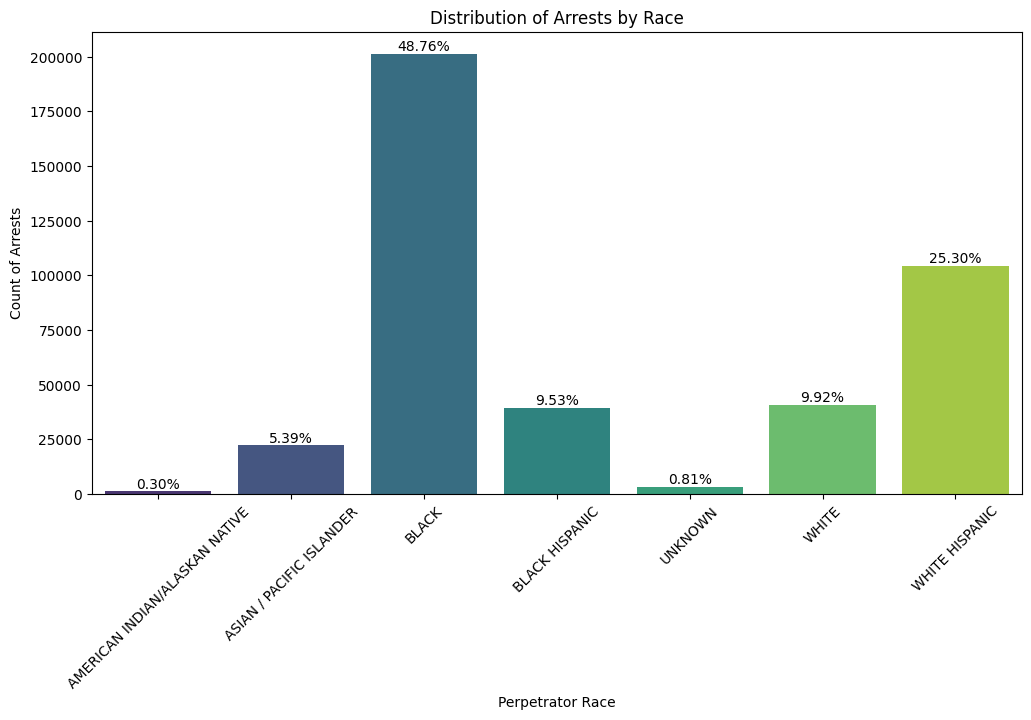

In [193]:
def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='PERP_RACE', palette='viridis')
total_arrests = len(df)
add_annotations(ax, total_arrests)
plt.title('Distribution of Arrests by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.show()


#### Arrest type by Race

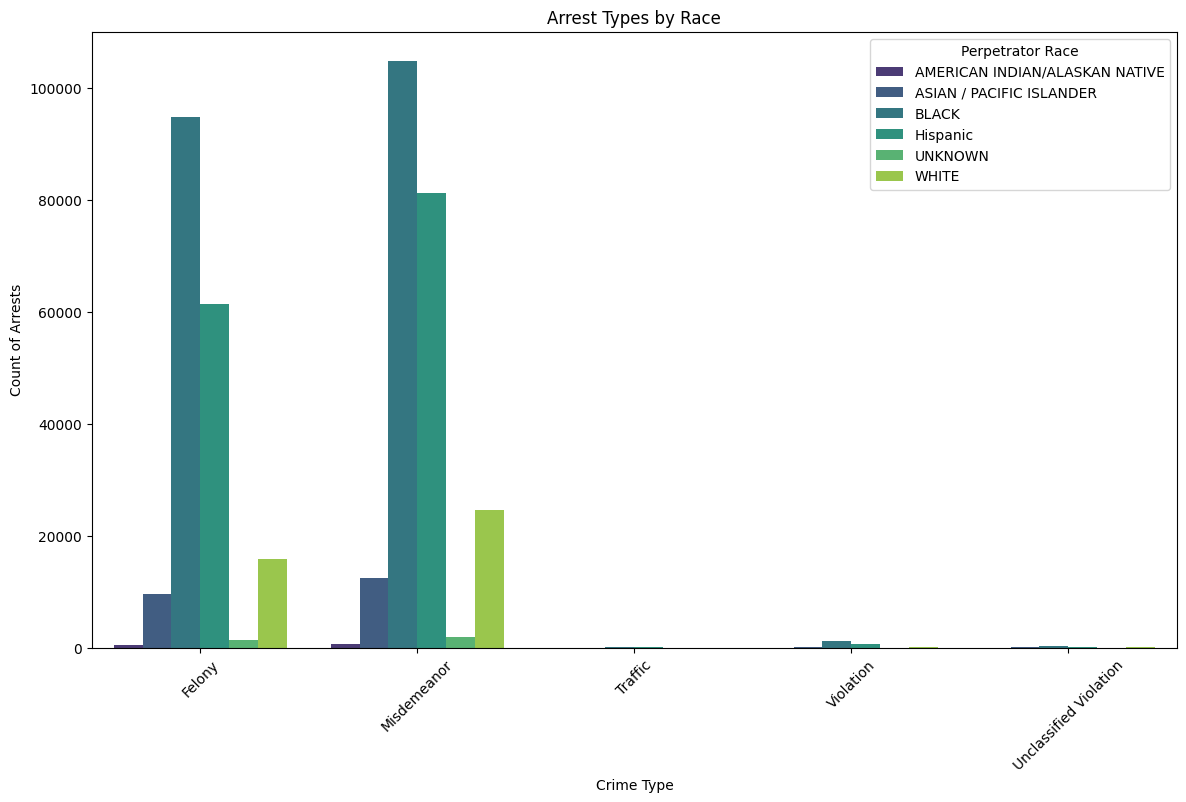

In [205]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x='LAW_CAT_CD', hue='PERP_RACE', palette='viridis')
plt.title('Arrest Types by Race')
plt.xlabel('Crime Type')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Perpetrator Race')
plt.show()


/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_8383/263359011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  felony_misdemeanor_df['PERP_RACE'] = felony_misdemeanor_df['PERP_RACE'].replace({


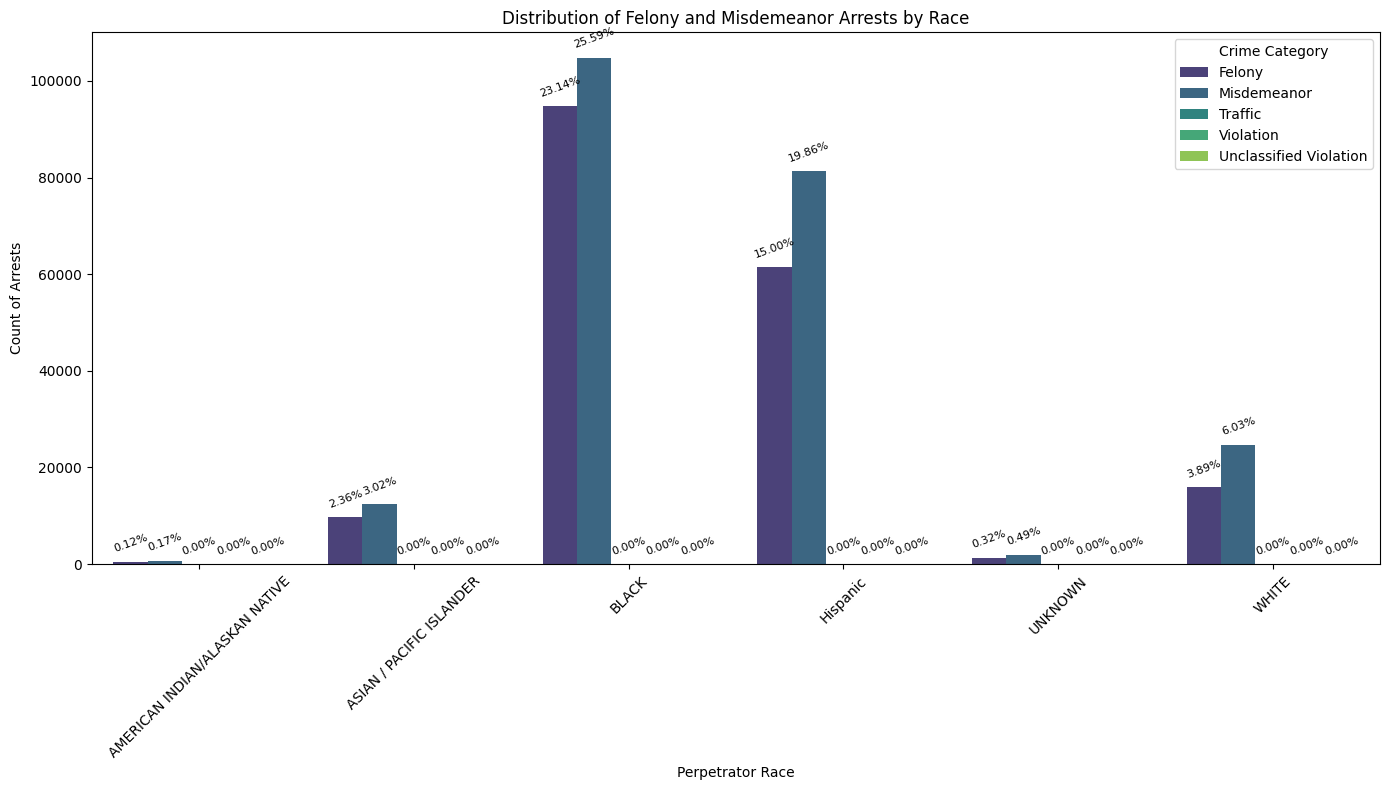

In [200]:
felony_misdemeanor_df = df[df['LAW_CAT_CD'].isin(['Felony', 'Misdemeanor'])]

# Merge 'Black Hispanic' and 'White Hispanic' into 'Hispanic'
felony_misdemeanor_df['PERP_RACE'] = felony_misdemeanor_df['PERP_RACE'].replace({
    'BLACK HISPANIC': 'Hispanic',
    'WHITE HISPANIC': 'Hispanic'
})

# Exclude 'Unknown' from the plot
# felony_misdemeanor_df = felony_misdemeanor_df[~felony_misdemeanor_df['PERP_RACE'].str.contains('UNKNOWN', case=False)]

plt.figure(figsize=(14, 8))
ax = sns.countplot(data=felony_misdemeanor_df, x='PERP_RACE', hue='LAW_CAT_CD', palette='viridis')
plt.title('Distribution of Felony and Misdemeanor Arrests by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Crime Category')

def add_annotations(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height + 100),
                    ha='center', va='bottom', fontsize=8, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=20)

total_arrests = len(felony_misdemeanor_df)
add_annotations(ax, total_arrests)
plt.subplots_adjust(top=0.9)

plt.tight_layout()
plt.show()


#### Arrests By Age and Race

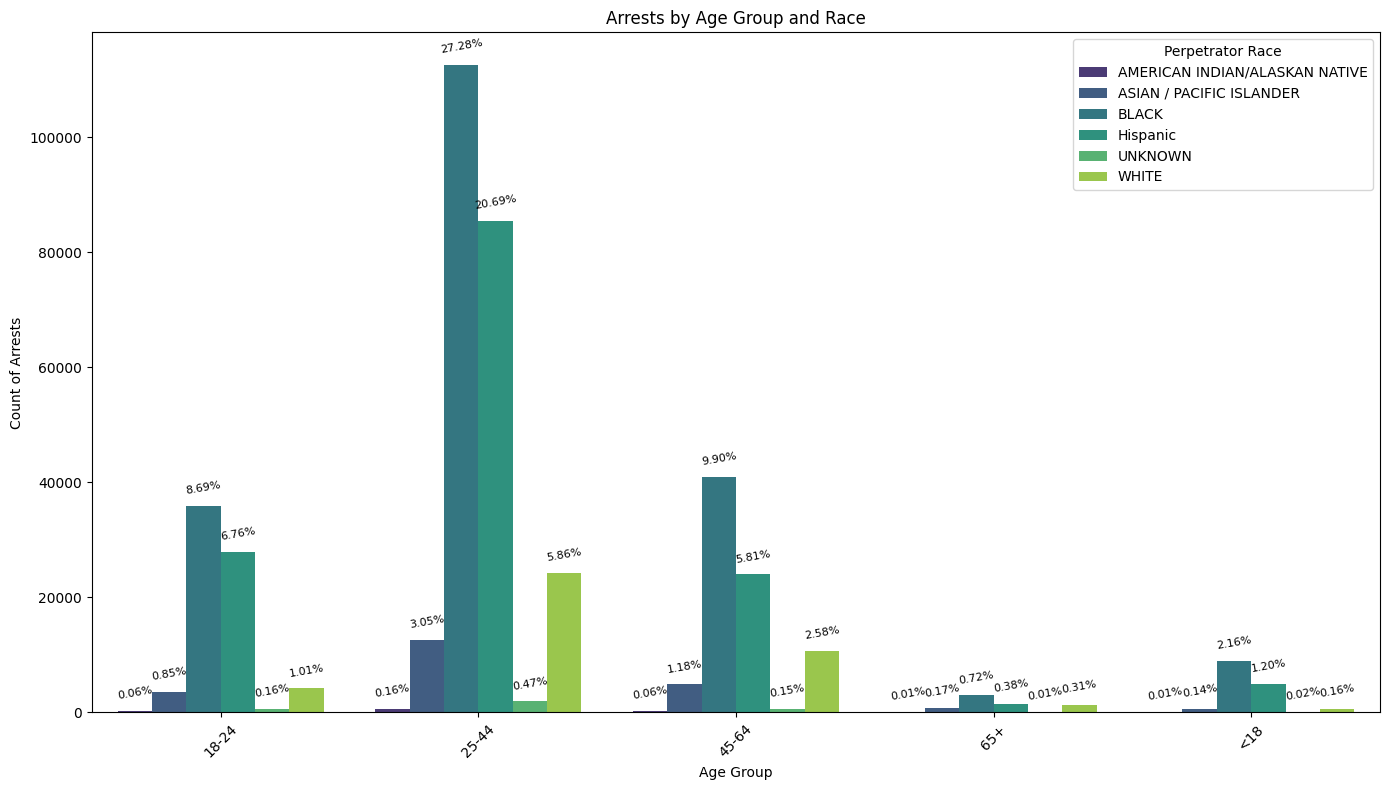

In [199]:
# Merge 'Black Hispanic' and 'White Hispanic' into 'Hispanic'
df['PERP_RACE'] = df['PERP_RACE'].replace({
    'BLACK HISPANIC': 'Hispanic',
    'WHITE HISPANIC': 'Hispanic'
})

# Exclude 'Unknown' race
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x='AGE_GROUP', hue='PERP_RACE', palette='viridis')

# Add annotations to the bars
def add_annotations(ax, df):
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height + 500),
                    ha='center', va='bottom', fontsize=8, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=10)

add_annotations(ax, df)
plt.title('Arrests by Age Group and Race')
plt.xlabel('Age Group')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Perpetrator Race')
plt.tight_layout()
plt.show()


#### Pre/Post Policy changes

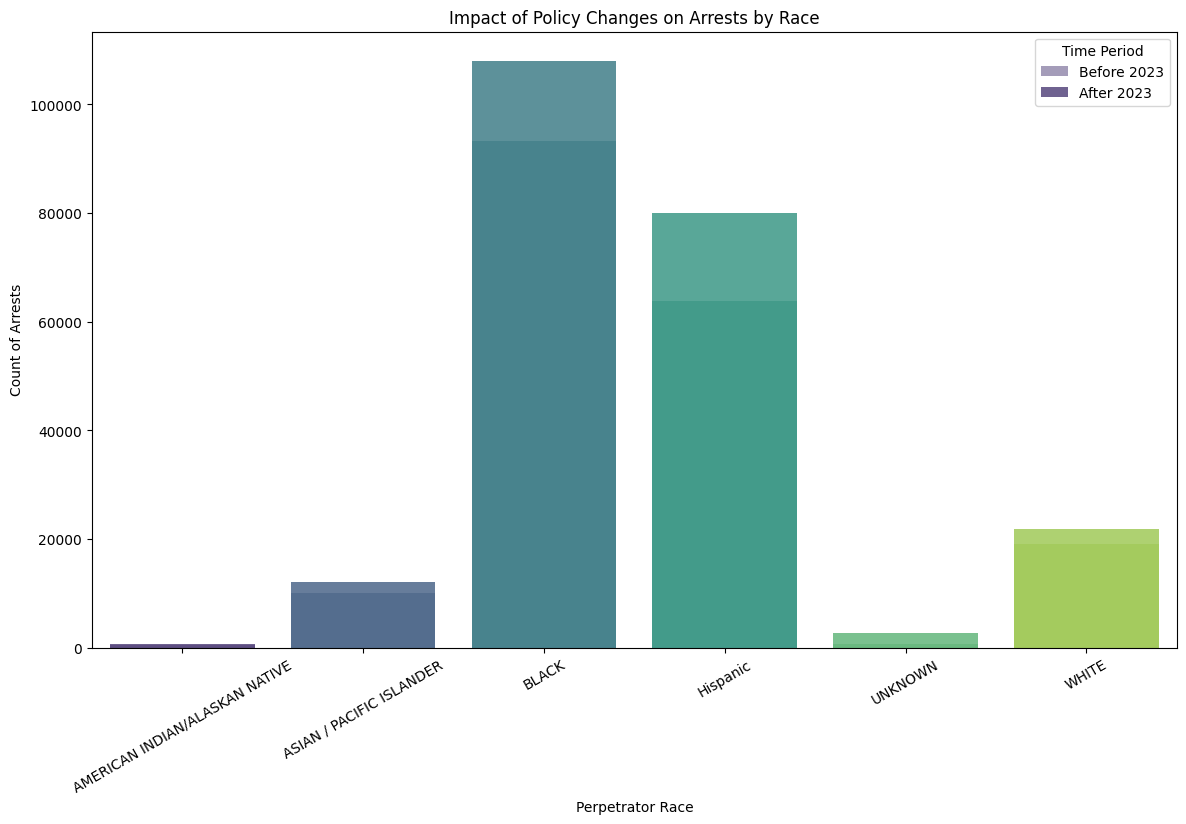

In [204]:
pre_policy_df = df[df['ARREST_DATE'] < '2023-01-01']
post_policy_df = df[df['ARREST_DATE'] >= '2023-01-01']

plt.figure(figsize=(14, 8))
ax = sns.countplot(data=pre_policy_df, x='PERP_RACE', palette='viridis', alpha=0.5, label='Before 2023')
sns.countplot(data=post_policy_df, x='PERP_RACE', palette='viridis', ax=ax, alpha=0.8, label='After 2023')
plt.title('Impact of Policy Changes on Arrests by Race')
plt.xticks(rotation=30)
plt.xlabel('Race')
plt.ylabel('Count of Arrests')
plt.legend(title='Time Period')
plt.savefig('Impact of Policy Changes On Arrests By Race')
plt.show()


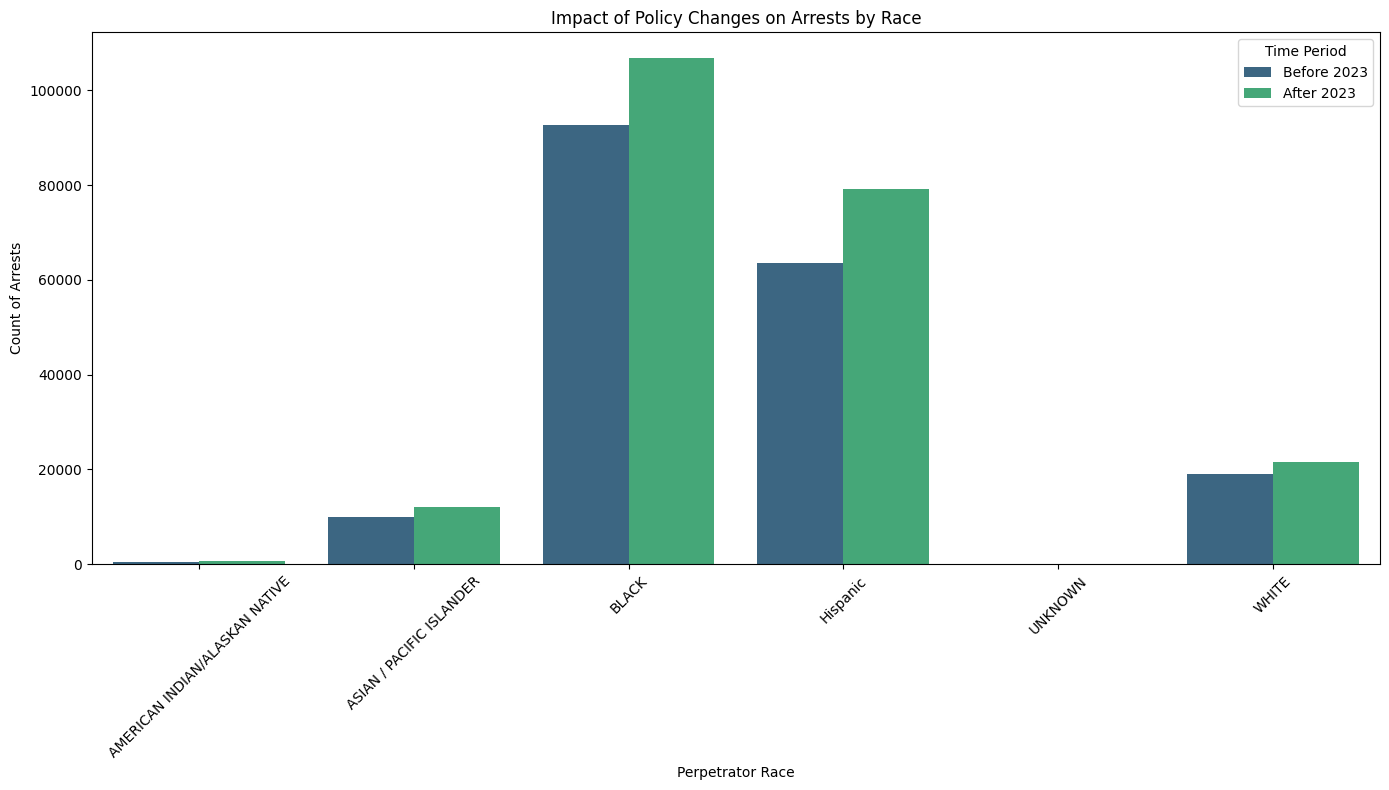

In [217]:
felony_misdemeanor_df['Time_Period'] = felony_misdemeanor_df['ARREST_DATE'].apply(lambda x: 'Before 2023' if x.year < 2023 else 'After 2023')

plt.figure(figsize=(14, 8))
ax = sns.countplot(data=felony_misdemeanor_df, x='PERP_RACE', hue='Time_Period', palette='viridis')
plt.title('Impact of Policy Changes on Arrests by Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Time Period')

#Annotation not being added correctly
# def add_annotations(ax, df):
#     for p in ax.patches:
#         height = p.get_height()
#         total = df[(df['PERP_RACE'] == p.get_x()) & (df['Time_Period'] == p.get_label())].shape[0]
#         percentage = (height / total) * 100 if total != 0 else 0
#         ax.annotate(f'{percentage:.2f}%', 
#                     (p.get_x() + p.get_width() / 2., height),
#                     ha='center', va='center', fontsize=10, color='black', 
#                     xytext=(0, 10), textcoords='offset points', rotation=45)

# add_annotations(ax, felony_misdemeanor_df)
plt.tight_layout()
plt.show()


The highest number of arrests are among Black individuals, followed by Hispanics.
There is a noticeable difference in the number of arrests before and after 2023 for both Black and Hispanic individuals.

Impact of Policy Changes:
For Black and Hispanic individuals, there is a increase in arrests after 2023, suggesting that policy changes may have had an impact.
Other races show less variation, implying that the policies might have affected specific racial groups differently.

In [219]:
df.to_csv('cleaned_nypd_2022_2023.csv',index=False)